In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import RNN

import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Load the MNIST data

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# number of labels/ classes
number_of_labels = len(np.unique(y_train))
print("No. of Labels: ", number_of_labels)

No. of Labels:  10


In [4]:
print("########### BEFORE CONVERTING INTO ONE-HOT ###########")
print("x_train: ", x_train)
print("y_train: ", y_train)

print("x_test: ", x_test)
print("y_test: ", y_test)

########### BEFORE CONVERTING INTO ONE-HOT ###########
x_train:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
y_train:  [5 0 4 ... 5 6 8]
x_test:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0

In [5]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of x_test: ",  x_test.shape)
print("Shape of y_test: ",  y_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


In [6]:
# now convert to one-hot
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [7]:
print("########### AFTER CONVERTING INTO ONE-HOT ###########")
print("y_train: ", y_train)
print("Shape of y_train: ", y_train.shape)

print("y_test: ", y_test)
print("Shape of y_test: ",  y_test.shape)

########### AFTER CONVERTING INTO ONE-HOT ###########
y_train:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Shape of y_train:  (60000, 10)
y_test:  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of y_test:  (10000, 10)


In [8]:
# resize the dataset
image_size = x_train.shape[1]

x_train = np.reshape(x_train, [-1, image_size, image_size])
x_test  = np.reshape(x_test,  [-1, image_size, image_size])

print("Reshaped x_train: ", x_train)
print("Reshaped x_test: ", x_test)

Reshaped x_train:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Reshaped x_test:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
 

In [9]:
# normalizing the data
x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32') / 255

print("Normalized x_train: ", x_train)
print("Normalized x_test: ", x_test)

Normalized x_train:  [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0

In [10]:
input_shape = (image_size, image_size)
batch_size  = 64
units       = 128
dropout     = 0.1

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN

In [12]:
model1 = Sequential()

model1.add(SimpleRNN(units = units, dropout=dropout, input_shape = input_shape))
model1.add(Dense(number_of_labels))
model1.add(Activation('softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               20096     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________


In [13]:
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=15, batch_size=batch_size)

Epoch 1/15
938/938 [==============================] - 13s 12ms/step - loss: 0.7716 - accuracy: 0.7691
Epoch 2/15
938/938 [==============================] - 11s 12ms/step - loss: 0.3248 - accuracy: 0.9054
Epoch 3/15
938/938 [==============================] - 11s 12ms/step - loss: 0.2295 - accuracy: 0.9333
Epoch 4/15
938/938 [==============================] - 11s 12ms/step - loss: 0.1884 - accuracy: 0.9443
Epoch 5/15
938/938 [==============================] - 11s 12ms/step - loss: 0.1656 - accuracy: 0.9514
Epoch 6/15
938/938 [==============================] - 11s 12ms/step - loss: 0.1485 - accuracy: 0.9560
Epoch 7/15
938/938 [==============================] - 11s 12ms/step - loss: 0.1364 - accuracy: 0.9598
Epoch 8/15
938/938 [==============================] - 11s 12ms/step - loss: 0.1237 - accuracy: 0.9640
Epoch 9/15
938/938 [==============================] - 11s 12ms/step - loss: 0.1161 - accuracy: 0.9651
Epoch 10/15
938/938 [==============================] - 11s 12ms/step - loss: 0.109

In [14]:
_, accuracy = model1.evaluate(x_test, y_test, batch_size=batch_size)

157/157 [==============================] - 1s 5ms/step - loss: 0.0864 - accuracy: 0.9744


In [15]:
# Save the trained model to an HDF5 file
model1.save_weights('/kaggle/working/mnist_RNN_model.h5')

In [16]:
model_json = model1.to_json()
with open('mnist_RNN_model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

In [17]:
from tensorflow.keras.models import model_from_json

# Load the model architecture
with open('mnist_RNN_model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()
    
loaded_model = model_from_json(loaded_model_json)

In [18]:
# Load the model weight
loaded_model.load_weights('/kaggle/working/mnist_RNN_model.h5')

In [19]:
# Make predictions
predictions = loaded_model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


In [20]:
# Process and analyze predictions
predicted_labels = np.argmax(predictions, axis=1)

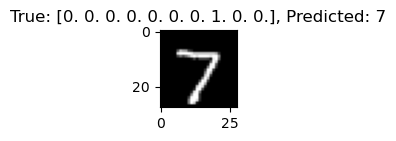

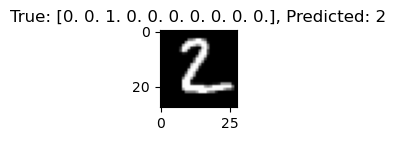

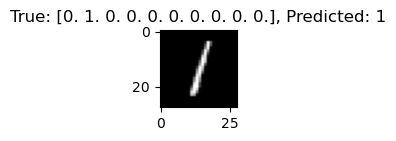

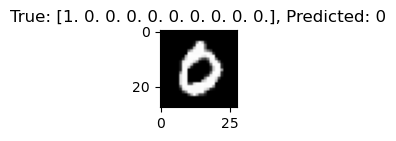

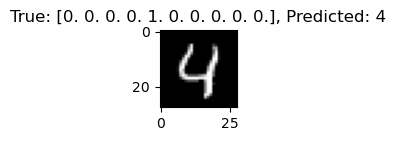

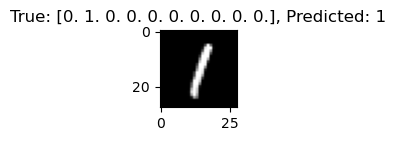

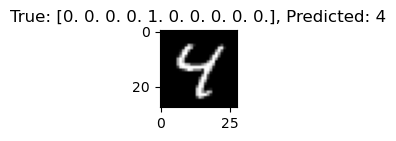

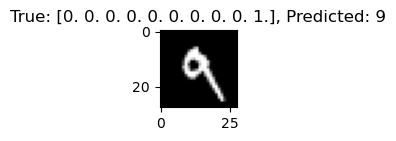

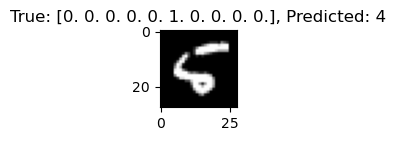

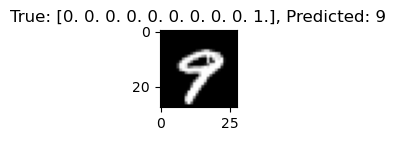

In [21]:
# Visualize a few predictions
for i in range(10):  # Display predictions for the first 10 samples
    plt.figure(figsize=(2, 1))
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {predicted_labels[i]}")
    plt.show()